# AULA 1

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
# Ler imagem
arara = cv2.imread("arara_medium.jpg")

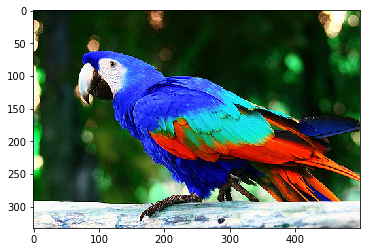

In [4]:
# Exibir imagem
plt.imshow(arara,interpolation="none")
plt.show()

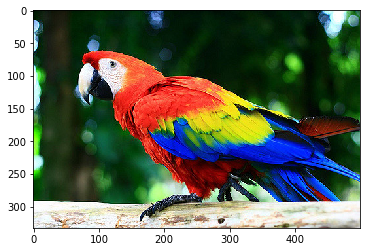

In [5]:
# Conversão de BGR para RGB
arara_rgb = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)
plt.imshow(arara_rgb,interpolation="none")
plt.show()

In [6]:
# Tamanho da imagem
arara.shape

(333, 500, 3)

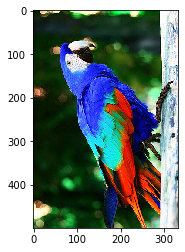

In [7]:
# Transpor uma matriz
trans_arara = arara.transpose((1,0,2))
plt.imshow(trans_arara,interpolation="none")
plt.show()

In [8]:
# Separando os canais de cor
arara_r, arara_g, arara_b = cv2.split(arara_rgb)

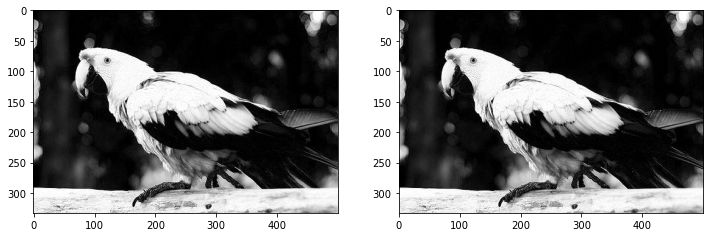

In [9]:
# Canal vermelho
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_r, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,0], cmap='gray') # Mostrando o resultado do canal 0
plt.show()

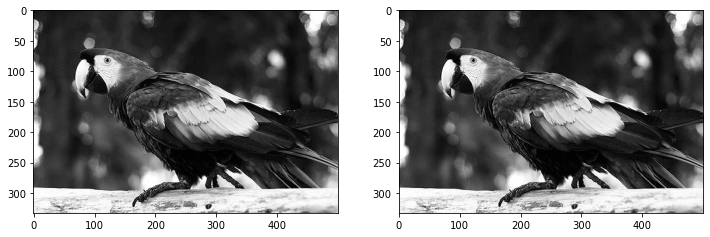

In [10]:
# Canal verde
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_g, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,1], cmap='gray') # Mostrando o resultado do canal 1
plt.show()

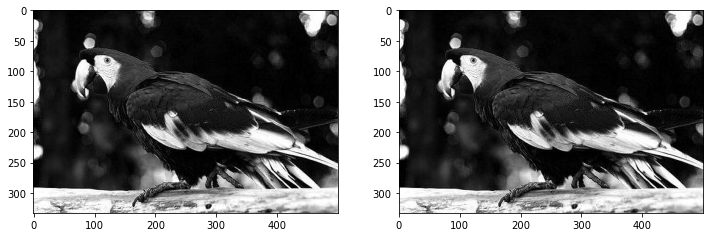

In [11]:
# Canal azul
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_b, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,2], cmap='gray') # Mostrando o resultado do canal 2
plt.show()

In [12]:
# Voltar à imagem original
arara_rgb_original = cv2.merge([arara_r, arara_g, arara_b])

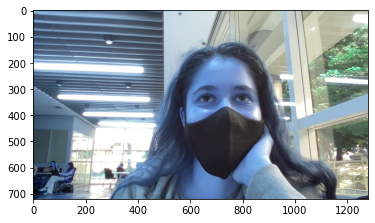

In [12]:
# WEBCAM
webcam = cv2.VideoCapture(0)

import time as t
t.sleep(5) # Espera a webcam ficar pronta

# função que de fato lê é a read()
val, image = webcam.read()

webcam.release() # fecha a webcam

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

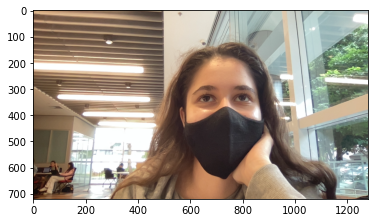

In [13]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [ ]:
# mostrar um video
webcam = cv2.VideoCapture(0)
while(True):
    val, image = webcam.read()
    if val:
        cv2.imshow("Vídeo da câmera", image)
    if cv2.waitKey(1) == 27: # Aguarda 1 ms pela tecla 'ESC'
        break
            
cv2.destroyAllWindows()
webcam.release()

In [13]:
imagem = cv2.imread("imagem.png")

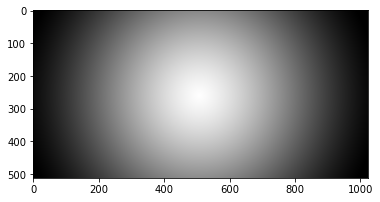

In [14]:
plt.imshow(imagem)
plt.show()

In [15]:
# Conversão de BGR para GRAY
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
saida = imagem_gray.copy()

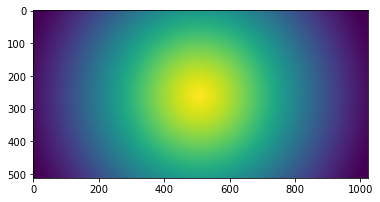

In [16]:
plt.imshow(imagem_gray)
plt.show()

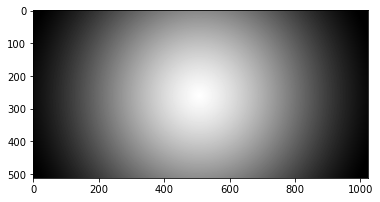

In [17]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

In [18]:
saida[:] = 0

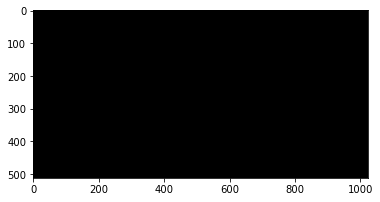

In [19]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

In [20]:
import numpy as np
saida = np.zeros(imagem_gray.shape, dtype=np.uint8)

# Exemplo de como percorrer a imagem com for, copiando pixel a pixel
for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        saida[i][j] = imagem_gray[i][j]

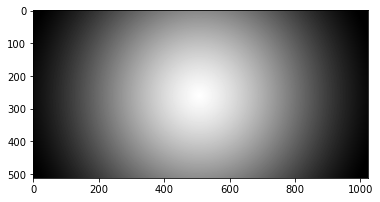

In [21]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

In [22]:
from math import pi
def scale(valor):  
    return (valor/255.0)*16*pi

In [23]:
from math import cos

for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        saida[i][j] = 127 + 124.0*cos(scale(imagem_gray[i][j]))

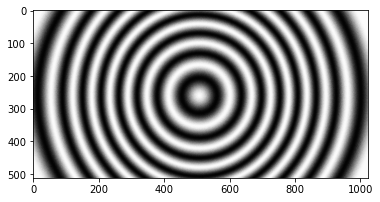

In [24]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

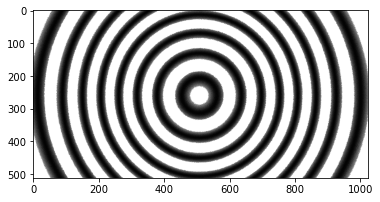

In [25]:
saida[saida > 128] = 255
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

In [26]:
# Inverter os canais com numpy
arara_rgb = arara[:,:,::-1].copy()

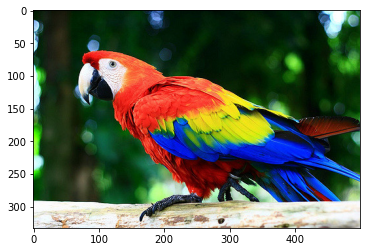

In [27]:
plt.imshow(arara_rgb)
plt.show()

In [28]:
# Region of Interest
# roi = imagem[minyy:maxy, minx:maxx]
minx, miny = 50,50
maxx, maxy = 250,250
yellow_rgb = (255,255,0)
arara_rgb = cv2.rectangle(arara_rgb, (minx, miny), (maxx, maxy), yellow_rgb)

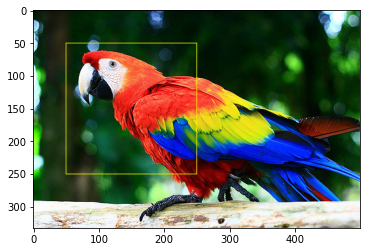

In [29]:
plt.imshow(arara_rgb)
plt.show()

In [30]:
# Recortar a imagem
recorte = arara_rgb[miny: maxy,minx: maxx]

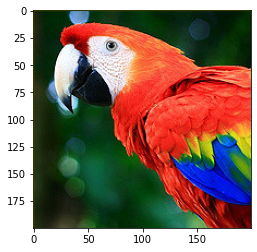

In [31]:
plt.imshow(recorte)
plt.show()

In [32]:
rintin_gray = cv2.imread("RinTinTin.jpg", cv2.IMREAD_GRAYSCALE)

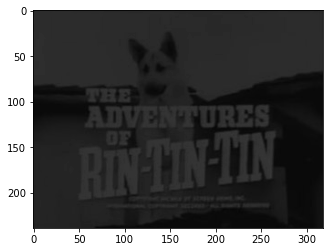

In [33]:
plt.imshow(rintin_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

In [40]:
# Mínimo, máximo e média
import numpy as np

minimo = np.min(rintin_gray)
maximo = np.max(rintin_gray)
media = np.mean(rintin_gray)
minimo, maximo, media

(7, 255, 164.15685113549642)

In [41]:
# Filtrando por valores
gray = rintin_gray

In [42]:
# quem está acima da média para branco (ou seja 255)
gray[gray > media] = 255

In [46]:
# quem está abaixo da média para preto
gray[gray < media] = 0

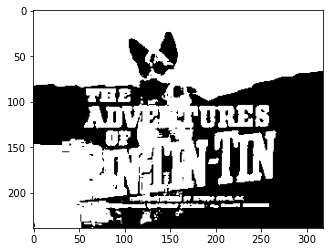

In [47]:
plt.imshow(rintin_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

In [48]:
# Achar os índices dos valores que atendem a uma certa condição:
# achar o mínimo x e o mínimo y que têm pixel preto na imagem acima
results = np.where(gray==0)
results

(array([ 24,  24,  24, ..., 238, 238, 238]),
 array([146, 147, 148, ..., 315, 316, 317]))

In [52]:
i_linha = results[0]
i_coluna = results[1]
menor_linha = min(i_linha)

In [58]:
# identificar onde esse valor se encontra no vetor i_linha
indices = np.where(i_linha == menor_linha)[0]
# escolher o menor dos indices
indice_1 = min(indices)

In [59]:

def crosshair(img, point, size, color):    
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,5)
    cv2.line(img,(x,y - size),(x, y + size),color,5)

In [60]:
# converter a imagem para uma imagem colorida
rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

In [61]:
yellow_rgb = (255,255,0)
crosshair(rgb, (i_coluna[indice_1], i_linha[indice_1]), 5, yellow_rgb)

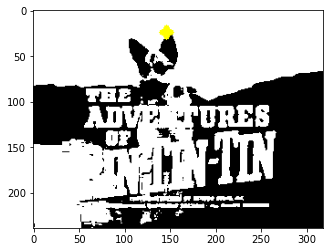

In [62]:
plt.imshow(rgb)
plt.show()

In [65]:
menor_coluna = min(i_coluna)
indices = np.where(i_coluna == menor_coluna)[0]
indice_2 = min(indices)

In [66]:
def crosshair(img, point, size, color):    
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,5)
    cv2.line(img,(x,y - size),(x, y + size),color,5)

In [67]:
# Converter imagem GRAY para RGB 
rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

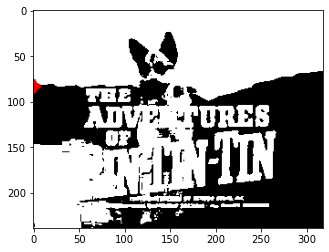

In [68]:
red_rgb = (255,0,0)
crosshair(rgb, (i_coluna[indice_2], i_linha[indice_2]), 5, red_rgb)
plt.imshow(rgb)
plt.show()

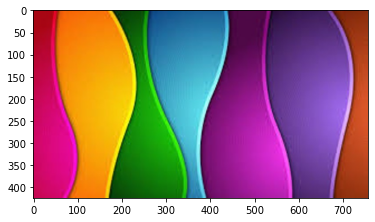

In [69]:
# Já invertendo os canais
cores_rgb = cv2.imread("cores.jpg")[:,:,::-1]
plt.imshow(cores_rgb)
plt.show()

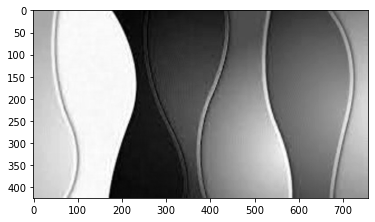

In [70]:
# Canal vermelho
cores_r = cores_rgb[:,:,0]
plt.imshow(cores_r, cmap='gray')
plt.show()

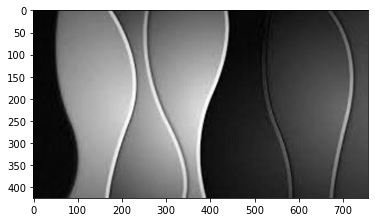

In [71]:
# Canal verde
cores_g = cores_rgb[:,:,1]
plt.imshow(cores_g, cmap='gray')
plt.show()

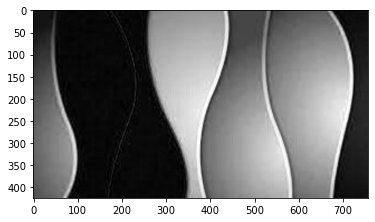

In [72]:
# Canal azul
cores_b = cores_rgb[:,:,2]
plt.imshow(cores_b, cmap='gray')
plt.show()

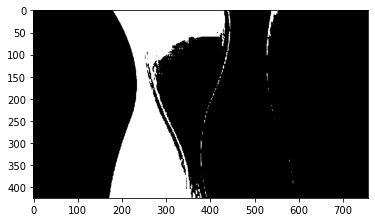

In [73]:
# Encontrando os pixels da cor verde
import numpy as np
# Cria uma imagem 'zerada' com as mesmas dimensões de 'cores_r'
mask_red = np.zeros_like(cores_r)
mask_red[cores_r < 45] = 255

plt.imshow(mask_red, cmap='gray')
plt.show()

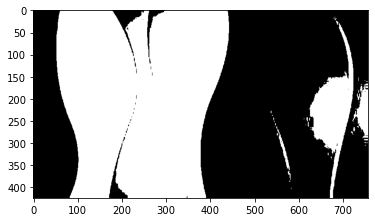

In [74]:
# Cria uma imagem 'zerada' com as mesmas dimensões de 'cores_g'
mask_green = np.zeros_like(cores_g)
mask_green[cores_g > 80] = 255

plt.imshow(mask_green, cmap='gray')
plt.show()

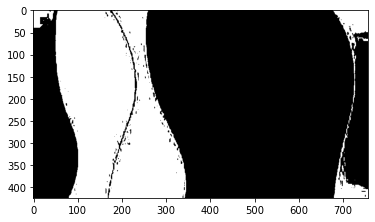

In [75]:
# Cria uma imagem 'zerada' com as mesmas dimensões de 'cores_b'
mask_blue = np.zeros_like(cores_b)
mask_blue[cores_b < 20] = 255

plt.imshow(mask_blue, cmap='gray')
plt.show()

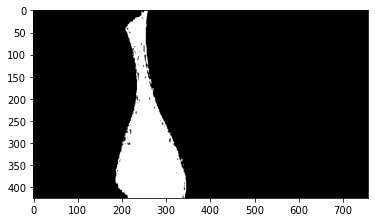

In [77]:
# Máscara
mask = cv2.bitwise_and(mask_blue, mask_red, mask=mask_green)
plt.imshow(mask, cmap='gray')
plt.show()